In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(color_codes=True)

## Assuming distributions for Availability parameters (MTBF, MTTR, MLDT)



 \\( A = \frac{MTBF}{MTBF+MTTR+MLDT} \\) 

### MTBF: Drawing samples from exponential distribution

10000


Text(0.5, 1.0, 'Distribution of MTBF (with assumed exponential distribution)')

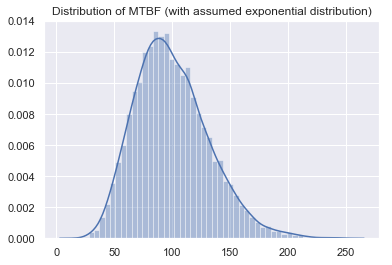

In [7]:
failData = np.array([]) 
MTBF_samples = np.array([])
#draw one sample from exp dist
drawSampleExp = lambda beta: np.random.exponential(scale=beta)

for i in range(10000): 
    #draw 10 samples
    for i in range(10):    
         failData = np.append(failData, drawSampleExp(100))
    MTBF = np.mean(failData)
    MTBF_samples = np.append(MTBF_samples, MTBF)
    failData = np.array([])
    

print(len(MTBF_samples))


df = pd.DataFrame()
df['MTBF_samples'] = MTBF_samples
df.to_csv("MTBF_for_samples_exp.csv")
sns.distplot(MTBF_samples)
plt.title("Distribution of MTBF (with assumed exponential distribution)")

### MTBF assuming gamma distribution with set parameters (scale = 9.98, shape= 10.03)


Text(0.5, 1.0, 'Distribution of MTBF (pulled from Gamma distribution)')

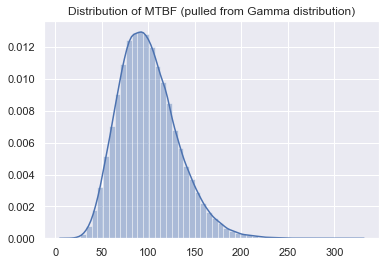

In [9]:
failData1 = np.array([]) 
MTBF1_samples = np.array([])
drawSampleGamma = lambda scale, shape: np.random.gamma(scale=scale, shape=shape)

for i in range(100000): 
    #draw 10 samples from Gamma
    #failData1 = np.append(failData1, drawSampleGamma(9.98, 10.03))
    MTBF1 = np.mean(drawSampleGamma(9.98, 10.03))
    MTBF1_samples = np.append(MTBF1_samples, MTBF1)
    failData1 = np.array([])

df1 = pd.DataFrame()
df1['MTBF1_samples'] = MTBF1_samples
df1.to_csv("MTBF_for_samples_gamma.csv")
sns.distplot(MTBF1_samples)
plt.title("Distribution of MTBF (pulled from Gamma distribution)")

### MTTR with a random sample of 20 repair times. Use mean and sigma to sample from lognormal distribution

Text(0.5, 1.0, 'Distribution of MTTR (assuming lognormal distribution)')

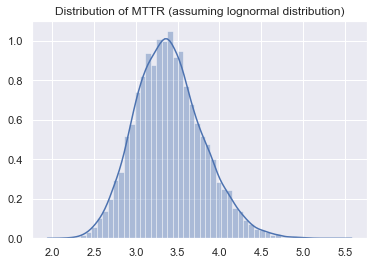

In [5]:
repairData = np.array([]) 
MTTR_samples = np.array([])
#draw one sample from lognormal distribution
drawSampleLn = lambda mean, sigma: np.random.lognormal(mean=mean, sigma=sigma)
#mean = np.mean(repairData)
#sigma = np.var(repairData)
mean = 1.1
sigma = .5

for i in range(10000): 
    #draw 10 samples
    for i in range(20):
        repairData = np.append(repairData, drawSampleLn(mean, sigma))
    MTTR = np.mean(repairData)
    MTTR_samples = np.append(MTTR_samples, MTTR)
    repairData = np.array([])
    
df2 = pd.DataFrame()
df2['MTTR_samples'] = MTTR_samples
df2.to_csv("MTTR_for_samples_lognormal.csv")
sns.distplot(MTTR_samples)
plt.title("Distribution of MTTR (assuming lognormal distribution)")